In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [61]:
def nested_cross_validation(pipeline, param_grid, X, y, outer_cv=5, inner_cv=3):
    """
    Perform nested cross-validation for model evaluation.
    
    Parameters:
    -----------
    pipeline : sklearn Pipeline
        The pipeline to evaluate (containing preprocessor and classifier)
    param_grid : dict
        Parameter grid for hyperparameter tuning
    X : array-like
        Feature data
    y : array-like
        Target data
    outer_cv : int, default=5
        Number of folds for outer cross-validation
    inner_cv : int, default=3
        Number of folds for inner cross-validation
    
    Returns:
    --------
    dict
        Dictionary containing results of nested cross-validation
    """
    # Convert inputs to numpy arrays if they aren't already
    X = np.array(X)
    y = np.array(y)
    
    # Initialize outer cross-validation
    outer_cv_split = KFold(n_splits=outer_cv, shuffle=True, random_state=42)
    
    # Store outer fold results
    outer_scores = []
    best_params_list = []
    all_models = []
    
    print(f"\nStarting nested cross-validation with {outer_cv} outer folds and {inner_cv} inner folds")
    
    # Outer loop
    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv_split.split(X)):
        print(f"\nOuter Fold {fold_idx+1}/{outer_cv}")
        
        # Split data for current fold
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        
        # Inner loop for hyperparameter tuning
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=inner_cv,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0,
            refit=True
        )
        
        # Fit grid search to training data
        grid_search.fit(X_train_fold, y_train_fold)
        
        # Store best model from this fold
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        all_models.append(best_model)
        best_params_list.append(best_params)
        
        # Evaluate the best model on test data
        y_pred = best_model.predict(X_test_fold)
        fold_score = accuracy_score(y_test_fold, y_pred)
        outer_scores.append(fold_score)
        
        print(f"  Best parameters: {best_params}")
        print(f"  Validation accuracy: {grid_search.best_score_:.4f}")
        print(f"  Test accuracy: {fold_score:.4f}")
    
    # Calculate and return statistics
    mean_accuracy = np.mean(outer_scores)
    std_accuracy = np.std(outer_scores)
    
    print(f"\nNested CV Results:")
    print(f"Mean Test Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Test Accuracy Range: [{min(outer_scores):.4f}, {max(outer_scores):.4f}]")
    
    return {
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy,
        'all_scores': outer_scores,
        'best_params': best_params_list,
        'models': all_models
    }


In [62]:
# Run nested CV for both models (instead of your existing simple CV)
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


print("Evaluating Random Forest with Nested Cross-Validation")
rf_results = nested_cross_validation(rf_pipeline, rf_param_grid, X_train, y_train)

print("\nEvaluating XGBoost with Nested Cross-Validation")
xgb_results = nested_cross_validation(xgb_pipeline, xgb_param_grid, X_train, y_train)

# Compare model performances
print("\nModel Comparison:")
print(f"Random Forest: {rf_results['mean_accuracy']:.4f} ± {rf_results['std_accuracy']:.4f}")
print(f"XGBoost: {xgb_results['mean_accuracy']:.4f} ± {xgb_results['std_accuracy']:.4f}")

Evaluating Random Forest with Nested Cross-Validation

Starting nested cross-validation with 5 outer folds and 3 inner folds

Outer Fold 1/5
  Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9618
  Test accuracy: 0.9419

Outer Fold 2/5
  Best parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9590
  Test accuracy: 0.9412

Outer Fold 3/5
  Best parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9589
  Test accuracy: 0.9882

Outer Fold 4/5
  Best parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
  Validation accuracy: 0.9531
  Test accu

C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
  Validation accuracy: 0.9707
  Test accuracy: 0.9535

Outer Fold 2/5


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
  Validation accuracy: 0.9619
  Test accuracy: 0.9294

Outer Fold 3/5


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9677
  Test accuracy: 1.0000

Outer Fold 4/5


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9707
  Test accuracy: 0.9765

Outer Fold 5/5
  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9589
  Test accuracy: 0.9765

Nested CV Results:
Mean Test Accuracy: 0.9672 ± 0.0239
Test Accuracy Range: [0.9294, 1.0000]

Model Comparison:
Random Forest: 0.9554 ± 0.0227
XGBoost: 0.9672 ± 0.0239


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [63]:
def plot_model_accuracy_comparison(rf_results, xgb_results):
    # Extract accuracy scores and standard deviations
    models = ['Random Forest', 'XGBoost']
    accuracies = [rf_results['mean_accuracy'], xgb_results['mean_accuracy']]
    std_devs = [rf_results['std_accuracy'], xgb_results['std_accuracy']]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set bar positions
    bar_positions = np.arange(len(models))
    
    # Create bars
    bars = ax.bar(bar_positions, accuracies, yerr=std_devs, 
                  align='center', alpha=0.7, capsize=10,
                  color=['orange', 'green'], ecolor='black')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.4f}', ha='center', va='bottom', 
                fontsize=14, fontweight='bold', color = 'black',
                bbox=dict(facecolor='white', alpha=0.8, pad=3, edgecolor='none'))
    
    # Customize plot
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(models, fontsize=12)
    ax.set_ylim(0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a horizontal line for reference (e.g., at 0.5 for baseline)
    ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Baseline (0.5)')
    
    # Add legend
    ax.legend()
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # return fig

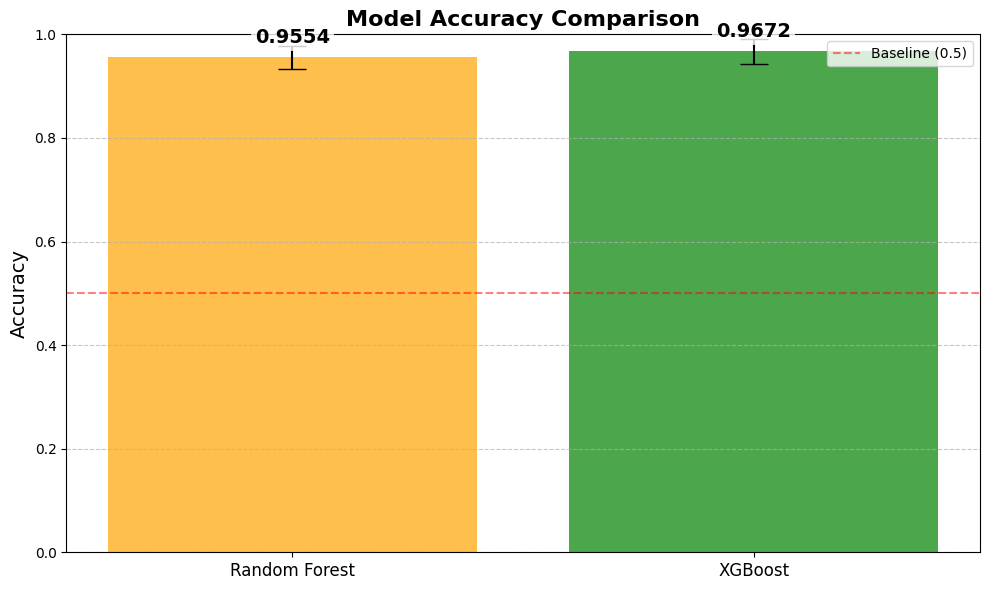

In [64]:
plot_model_accuracy_comparison(rf_results, xgb_results)


In [65]:
def get_most_common_params(param_lists):
    # Count parameter occurrences
    param_counts = {}
    
    for params in param_lists:
        param_tuple = tuple(sorted(params.items()))
        if param_tuple not in param_counts:
            param_counts[param_tuple] = 0
        param_counts[param_tuple] += 1
    
    # Get most common parameter combination
    most_common_params = dict(max(param_counts.items(), key=lambda x: x[1])[0])
    return most_common_params

In [66]:
rf_best_params = get_most_common_params(rf_results['best_params'])
xgb_best_params = get_most_common_params(xgb_results['best_params'])

print("\nBest Random Forest parameters:", rf_best_params)
print("Best XGBoost parameters:", xgb_best_params)



Best Random Forest parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best XGBoost parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [67]:
# Train final models with the best parameters
final_rf_pipeline = rf_pipeline.set_params(**rf_best_params)
final_xgb_pipeline = xgb_pipeline.set_params(**xgb_best_params)


In [68]:
final_rf_pipeline.fit(X_train, y_train)
final_xgb_pipeline.fit(X_train, y_train)


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, min_samples_leaf=2,
                               min_samples_split=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, ...))])

In [69]:
# Make predictions on the test set (as in your original code)
y_pred_rf = final_rf_pipeline.predict(X_test)
y_pred_xgb = final_xgb_pipeline.predict(X_test)


In [70]:
y_pred_rf_proba = final_rf_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1
y_pred_xgb_proba = final_xgb_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1

In [71]:
threshold = 0.5
y_pred_rf_binary = (y_pred_rf_proba >= threshold).astype(int)
y_pred_xgb_binary = (y_pred_xgb_proba >= threshold).astype(int)

In [72]:
y_pred_rf_binary

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [73]:
y_pred_xgb_binary

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [74]:
from sklearn.metrics import accuracy_score, classification_report

print("\nRandom Forest Test Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_binary):.4f}")
print(classification_report(y_test, y_pred_rf_binary))

print("\nXGBoost Test Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_binary):.4f}")
print(classification_report(y_test, y_pred_xgb_binary))


Random Forest Test Results:
Accuracy: 0.9720
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


XGBoost Test Results:
Accuracy: 0.9580
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [75]:
print("\nRandom Forest (first 10):")
for prob, binary in zip(y_pred_rf_proba[:10], y_pred_rf_binary[:10]):
    print(f"Probability: {prob:.4f}, Class: {binary}")

print("\nXGBoost (first 10):")
for prob, binary in zip(y_pred_xgb_proba[:10], y_pred_xgb_binary[:10]):
    print(f"Probability: {prob:.4f}, Class: {binary}")


Random Forest (first 10):
Probability: 0.0312, Class: 0
Probability: 1.0000, Class: 1
Probability: 1.0000, Class: 1
Probability: 0.0003, Class: 0
Probability: 0.0000, Class: 0
Probability: 0.9991, Class: 1
Probability: 1.0000, Class: 1
Probability: 0.9100, Class: 1
Probability: 0.6050, Class: 1
Probability: 0.0021, Class: 0

XGBoost (first 10):
Probability: 0.0260, Class: 0
Probability: 0.9990, Class: 1
Probability: 0.9968, Class: 1
Probability: 0.0020, Class: 0
Probability: 0.0005, Class: 0
Probability: 0.9985, Class: 1
Probability: 0.9980, Class: 1
Probability: 0.9412, Class: 1
Probability: 0.7244, Class: 1
Probability: 0.0027, Class: 0


In [76]:
# def evaluate_model_with_cv(model, X, y):
#     scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
#     print(f"{model.named_steps['classifier'].__class__.__name__} Accuracy (CV): {scores.mean():.4f}")
#     return scores

In [77]:
# from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# rf_cv_scores = evaluate_model_with_cv(rf_pipeline, X, y)
# xgb_cv_scores = evaluate_model_with_cv(xgb_pipeline, X, y)

In [78]:
# plt.figure(figsize=(10, 5))
# sns.boxplot(data=[rf_cv_scores, xgb_cv_scores], palette=['blue', 'orange'])
# plt.xticks([0, 1], ['Random Forest', 'XGBoost'])
# plt.title("Model Performance Comparison (CV)")
# plt.ylabel("Accuracy")
# plt.show()

In [79]:
# print("XGBoost CV scores:", xgb_cv_scores)
# print("XGBoost min score:", min(xgb_cv_scores))
# print("XGBoost min score:", max(xgb_cv_scores))
# print("XGBoost quartiles:", np.percentile(xgb_cv_scores, [25, 50, 75]))

In [80]:
# print("Random Forest CV scores:", rf_cv_scores)
# print("Random Forest min score:", min(rf_cv_scores))
# print("Random Forest max score:", max(rf_cv_scores))
# print("Random Forest quartiles:", np.percentile(rf_cv_scores, [25, 50, 75]))

In [81]:
# rf_pipeline.fit(X_train, y_train)
# xgb_pipeline.fit(X_train, y_train)


In [82]:
# y_pred_rf = rf_pipeline.predict(X_test)
# y_pred_xgb = xgb_pipeline.predict(X_test)

In [83]:
# y_pred_rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1
# y_pred_xgb_proba = xgb_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1


In [84]:
# threshold = 0.5
# y_pred_rf_binary = (y_pred_rf_proba >= threshold).astype(int)
# y_pred_xgb_binary = (y_pred_xgb_proba >= threshold).astype(int)


In [85]:
# print("Random Forest (first 10) :")
# for prob, binary in zip(y_pred_rf_proba[:10], y_pred_rf_binary[:10]):
#     print(f"Probability: {prob:.4f}, Class: {binary}")

# print("\nXGBoost (first 10):")
# for prob, binary in zip(y_pred_xgb_proba[:10], y_pred_xgb_binary[:10]):
#     print(f"Probability: {prob:.4f}, Class: {binary}")

In [86]:
from sklearn.metrics import log_loss
rf_loss = log_loss(y_test, y_pred_rf_binary)

# Calculate log loss for XGBoost model
xgb_loss = log_loss(y_test, y_pred_xgb_binary)

print(f"Random Forest Log Loss: {rf_loss:.4f}")
print(f"XGBoost Log Loss: {xgb_loss:.4f}")

Random Forest Log Loss: 1.0082
XGBoost Log Loss: 1.5123


In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_binary):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb_binary):.4f}")

# Detailed classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_binary))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_binary))

# Confusion matrices
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_binary))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_binary))

Random Forest Accuracy: 0.9720
XGBoost Accuracy: 0.9580

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Random Forest Confusion Matrix:
[[88  1]
 [ 3 51]]

XGBoost Confusion Matrix:
[[86  3]
 [ 3 51]]


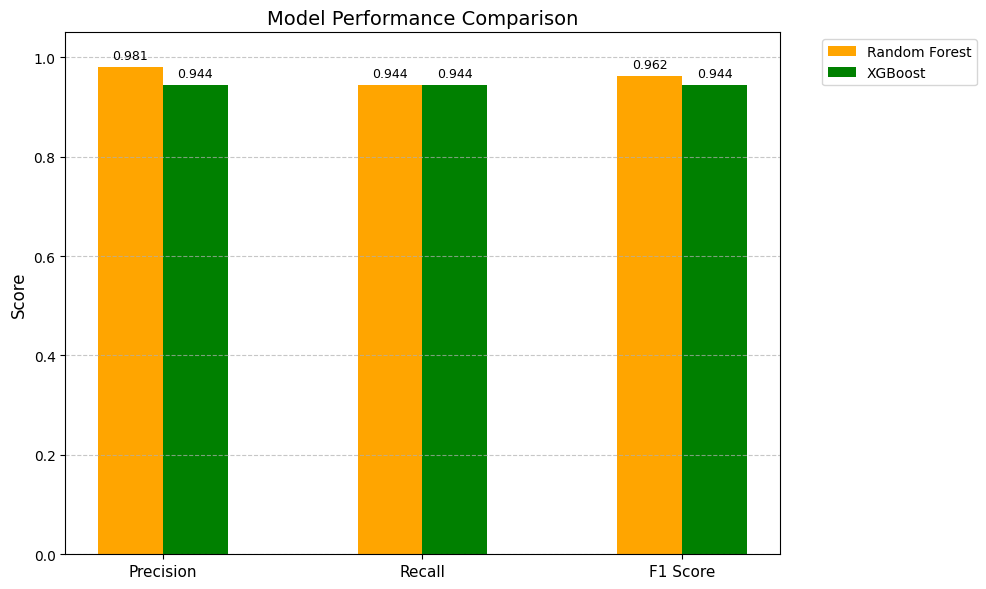

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for both models
rf_precision = precision_score(y_test, y_pred_rf_binary)
rf_recall = recall_score(y_test, y_pred_rf_binary)
rf_f1 = f1_score(y_test, y_pred_rf_binary)

xgb_precision = precision_score(y_test, y_pred_xgb_binary)
xgb_recall = recall_score(y_test, y_pred_xgb_binary)
xgb_f1 = f1_score(y_test, y_pred_xgb_binary)

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
barWidth = 0.25
positions1 = np.arange(3)
positions2 = [x + barWidth for x in positions1]

# Create bars
rf_bars = ax.bar(positions1, [rf_precision, rf_recall, rf_f1], barWidth, 
                 color='orange', label='Random Forest')
xgb_bars = ax.bar(positions2, [xgb_precision, xgb_recall, xgb_f1], barWidth,
                  color='green', label='XGBoost')

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

add_labels(rf_bars)
add_labels(xgb_bars)

# Customize plot
ax.set_ylim(0, 1.05)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks([r + barWidth/2 for r in range(3)])
ax.set_xticklabels(['Precision', 'Recall', 'F1 Score'], fontsize=11)
ax.legend(fontsize=11)

# Move the legend to a different location
# ax.legend(loc='lower right')  # or 'upper right', 'lower left', etc.

# Alternatively, place the legend outside the plot area
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [89]:
print(f"XGBoost Precision: {xgb_precision:.6f}")
print(f"XGBoost Recall: {xgb_recall:.6f}")
print(f"XGBoost F1: {xgb_f1:.6f}")

XGBoost Precision: 0.944444
XGBoost Recall: 0.944444
XGBoost F1: 0.944444


In [90]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_binary))

XGBoost Confusion Matrix:
[[86  3]
 [ 3 51]]


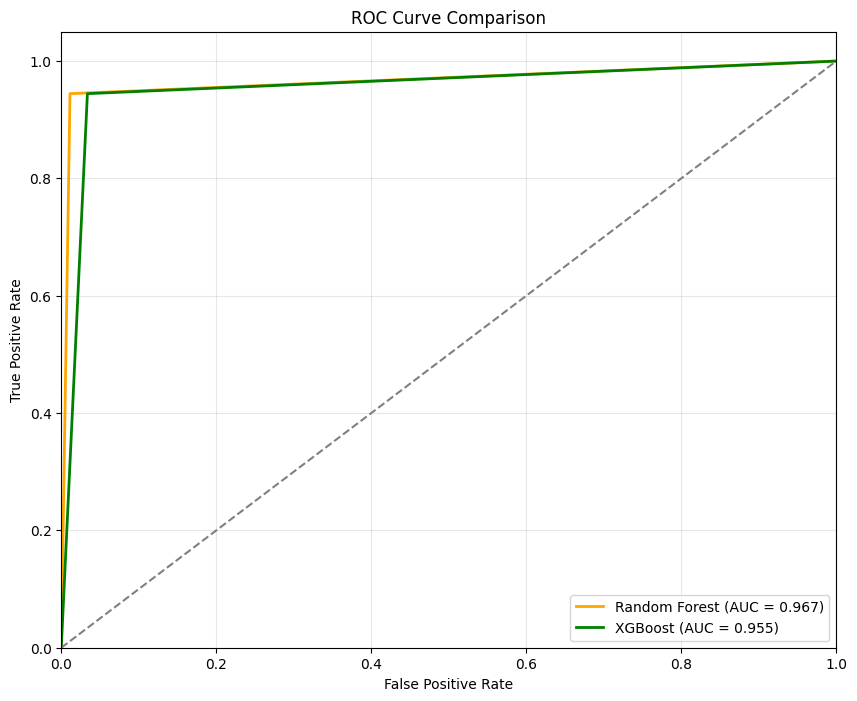

In [91]:
from sklearn.metrics import roc_curve, auc

rf_probs = final_rf_pipeline.predict_proba(X_test)[:, 1]
xgb_probs = final_xgb_pipeline.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_pred_rf_binary)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test,y_pred_xgb_binary)

rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='orange', lw=2, 
         label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, 
         label=f'XGBoost (AUC = {xgb_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

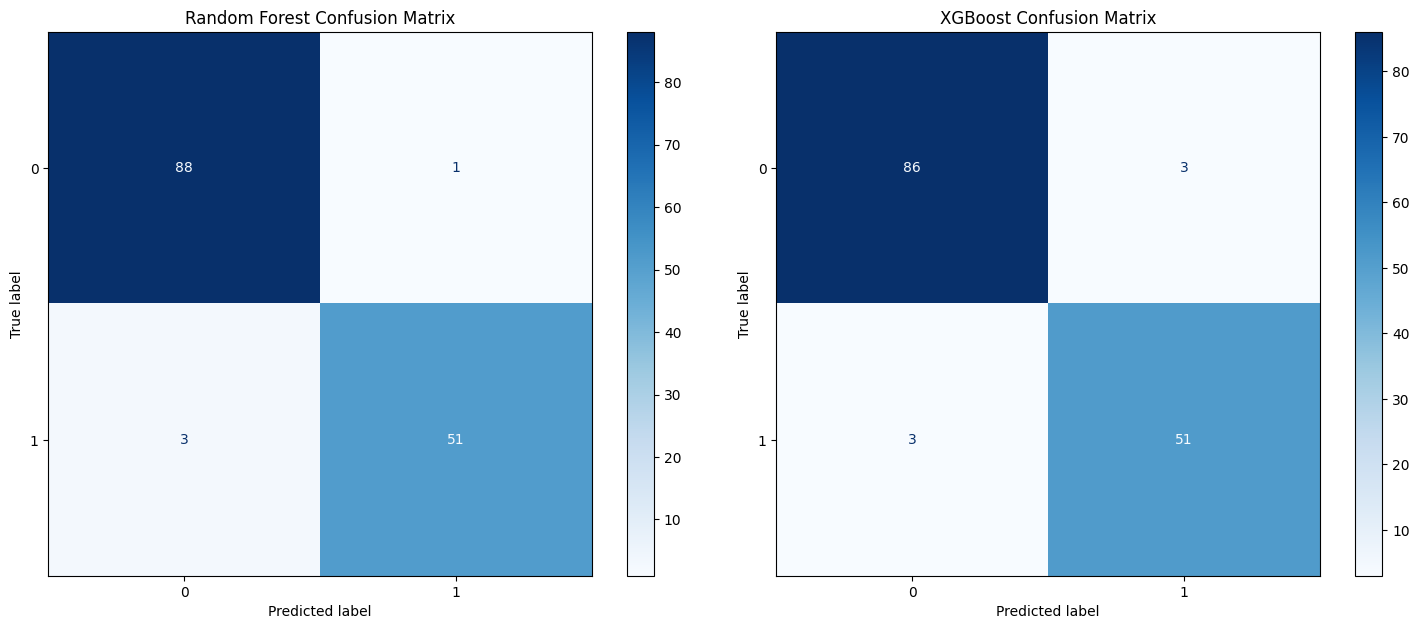

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_binary)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=ax1, cmap='Blues', values_format='d')
ax1.set_title('Random Forest Confusion Matrix')

# Plot XGBoost confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_binary)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(ax=ax2, cmap='Blues', values_format='d')
ax2.set_title('XGBoost Confusion Matrix')

plt.tight_layout()
plt.show()

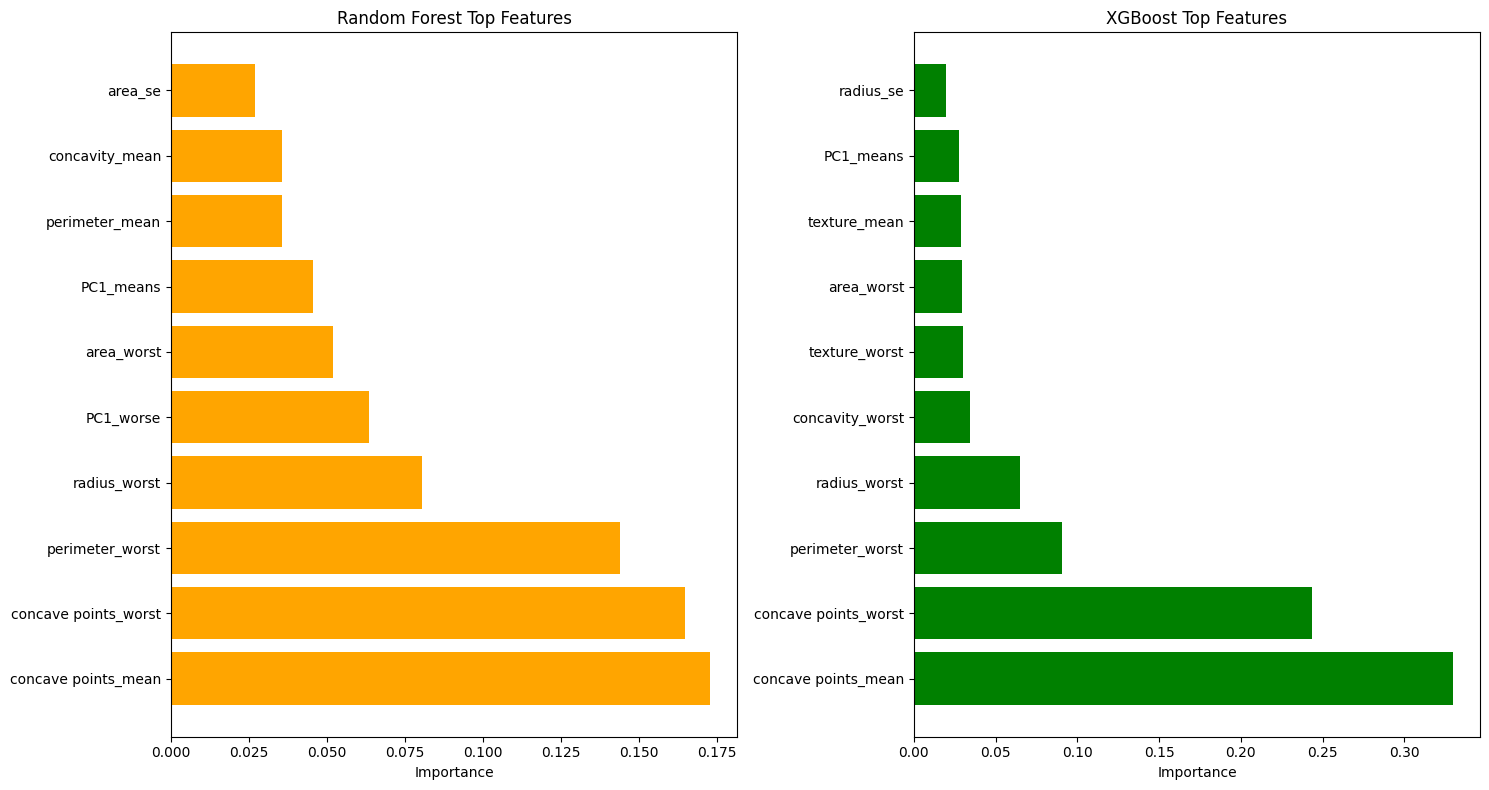

In [93]:
# Get feature importances
rf_importances = final_rf_pipeline.named_steps['classifier'].feature_importances_
xgb_importances = final_xgb_pipeline.named_steps['classifier'].feature_importances_

# Get feature names (adjust according to your dataset)
feature_names = X.columns

# Sort feature indices by importance
sorted_rf_idx = rf_importances.argsort()[::-1]
sorted_xgb_idx = xgb_importances.argsort()[::-1]

# Take top 10 features for each model
top_n = 10
top_rf_features = feature_names[sorted_rf_idx][:top_n]
top_xgb_features = feature_names[sorted_xgb_idx][:top_n]

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Random Forest feature importance
ax1.barh(range(top_n), rf_importances[sorted_rf_idx][:top_n], color='orange')
ax1.set_yticks(range(top_n))
ax1.set_yticklabels(top_rf_features)
ax1.set_title('Random Forest Top Features')
ax1.set_xlabel('Importance')

# XGBoost feature importance
ax2.barh(range(top_n), xgb_importances[sorted_xgb_idx][:top_n], color='green')
ax2.set_yticks(range(top_n))
ax2.set_yticklabels(top_xgb_features)
ax2.set_title('XGBoost Top Features')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()

C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


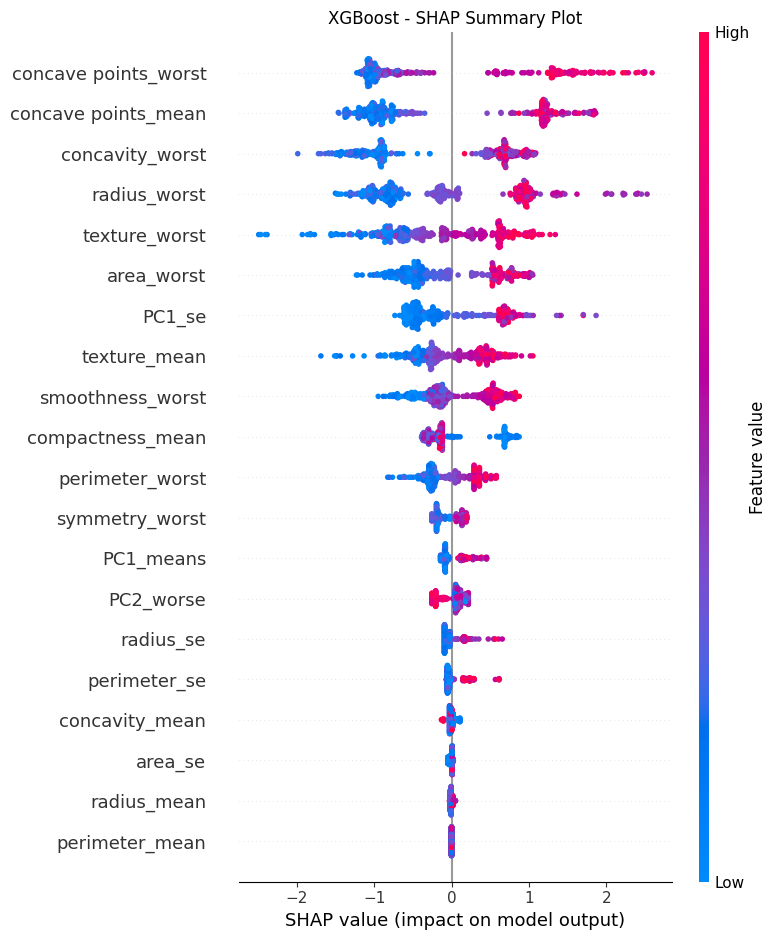

<Figure size 640x480 with 0 Axes>

In [94]:
import shap

X_train_processed_xgb = final_xgb_pipeline.named_steps['preprocessor'].transform(X_train)
if hasattr(X_train_processed_xgb, "toarray"):
    X_train_processed_xgb = X_train_processed_xgb.toarray()

# Step 2: Get SHAP values
xgb_model = final_xgb_pipeline.named_steps['classifier']
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train_processed_xgb)

# Step 3: Get original feature names from X_train
feature_names = X_train.columns.tolist()

# Step 4: Create the plot with actual feature names
plt.figure(figsize=(10, 8))
plt.title("XGBoost - SHAP Summary Plot")
shap.summary_plot(shap_values_xgb, X_train_processed_xgb, feature_names=feature_names)
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

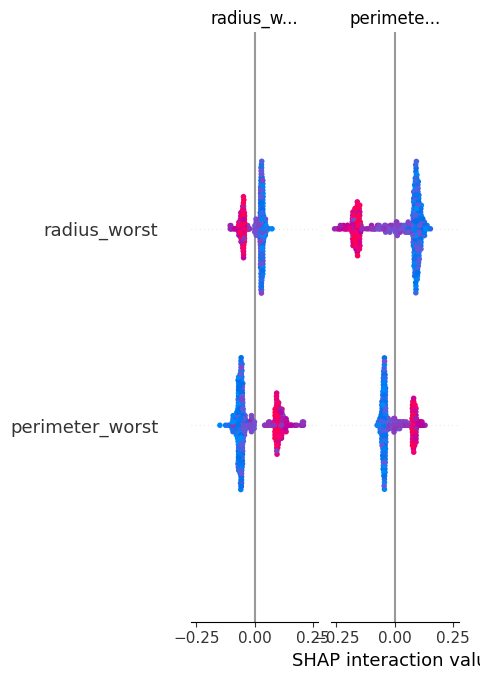

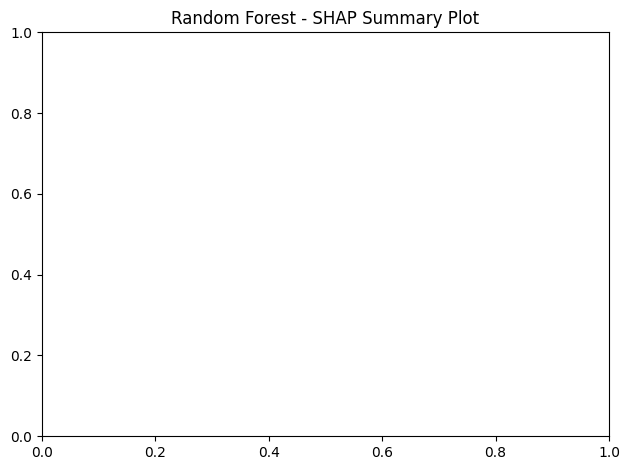

In [95]:
# Step 1: Process the data through the preprocessor first
X_train_processed = final_rf_pipeline.named_steps['preprocessor'].transform(X_train)

# Step 2: Convert to dense array if it's sparse
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()

# Step 3: Get the trained model from the pipeline
rf_model = final_rf_pipeline.named_steps['classifier']

# Step 4: Create the explainer and get SHAP values
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train_processed)

# Step 5: Create feature names if possible
try:
    feature_names = final_rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
except:
    feature_names = [f'feature_{i}' for i in range(X_train_processed.shape[1])]

# Step 6: Create the summary plot
plt.figure(figsize=(20, 20))
# For classification, we typically want the positive class (index 1)
if isinstance(shap_values_rf, list):
    # This means it's a multi-class problem - use class 1 for binary classification
    shap.summary_plot(shap_values_rf[1], X_train_processed, feature_names=feature_names)
else:
    # For regression or single output models
    shap.summary_plot(shap_values_rf, X_train_processed, feature_names=feature_names)

plt.title("Random Forest - SHAP Summary Plot")
plt.tight_layout()
plt.show()